<h1><center>Decision Trees</center></h1>

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#dataset">Import the dataset</a></li>
        <li><a href="#pre-processing">Pre-processing</a></li>
        <li><a href="#setting_up_tree">Setting up the Decision Tree</a></li>
        <li><a href="#modeling">Modeling</a></li>
        <li><a href="#prediction">Prediction</a></li>
        <li><a href="#evaluation">Evaluation</a></li>
   </ul>
</div>
<br>
<hr>

In [108]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.style.use('ggplot')

<h2 id="dataset">Import the dataset</h2>

In [109]:
#import the data

df = pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


<h2 id="#pre-processing">Pre-processing</h2>

In [110]:
#step1
#handle the missing values of numeric columns

missing_data = df.isnull().sum()
missing_data[['Age','Na_to_K']]

Age        0
Na_to_K    0
dtype: int64

No missing values in numeric values.

Percentage of Male : 52 %
Percentage of Female : 48 %


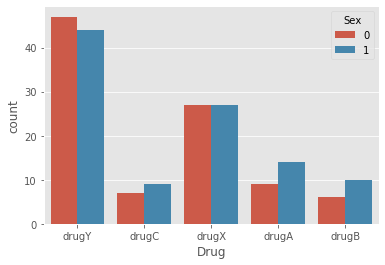

In [124]:
sns.countplot(df['Drug'],hue=df['Sex'])
male, female = df.Sex.value_counts()
print("Percentage of Male :", round(male/(male+female)*100),'%' )
print("Percentage of Female :", round(female/(male+female)*100 ),'%')

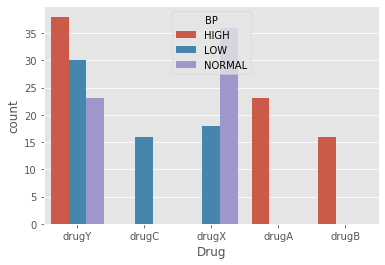

In [112]:
sns.countplot(df['Drug'],hue=df['BP'])

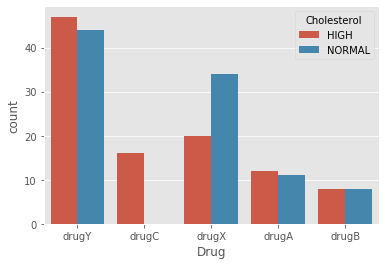

In [113]:
sns.countplot(df['Drug'],hue=df['Cholesterol'])

In [114]:
#step2
#Encoding for string values

from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
df['Sex'] = le_sex.transform(df['Sex']) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
df['BP'] = le_BP.transform(df['BP'])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
df['Cholesterol'] = le_Chol.transform(df['Cholesterol']) 


In [115]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY


<h2 id="setting_up_tree">Setting up the Decision Tree</h2>

In [116]:
X = df[['Age','Sex','BP','Cholesterol','Na_to_K']]
y = df['Drug']

In [117]:
#step3
#split the data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=3)

In [118]:
print('Train set:')
print(X_train.shape)
print(y_train.shape)
print('Test set:')
print(X_test.shape)
print(y_test.shape)

Train set:
(140, 5)
(140,)
Test set:
(60, 5)
(60,)


<h2 id="modeling">Modeling</h2>

In [119]:
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

<h2 id="prediction">Prediction</h2>

In [120]:
pred = tree_clf.predict(X_test)
pred

array(['drugY', 'drugX', 'drugX', 'drugX', 'drugX', 'drugC', 'drugY',
       'drugA', 'drugB', 'drugA', 'drugY', 'drugA', 'drugY', 'drugY',
       'drugX', 'drugY', 'drugX', 'drugX', 'drugB', 'drugX', 'drugX',
       'drugY', 'drugY', 'drugY', 'drugX', 'drugB', 'drugY', 'drugY',
       'drugA', 'drugX', 'drugB', 'drugC', 'drugC', 'drugX', 'drugX',
       'drugC', 'drugY', 'drugX', 'drugX', 'drugX', 'drugA', 'drugY',
       'drugC', 'drugY', 'drugA', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugB', 'drugX', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugA', 'drugX', 'drugY', 'drugX'], dtype=object)

In [121]:
print (pred [0:5])
print (y_test [0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


<h2 id="evaluation">Evaluation</h2>

In [122]:
from sklearn import metrics

print("Train score:")
print("Accuracy score: ", metrics.accuracy_score(tree_clf.predict(X_train), y_train))

Train score:
Accuracy score:  1.0


In [123]:
print("Test score:")
print("Accuracy score: ", metrics.accuracy_score(pred, y_test))

Test score:
Accuracy score:  0.9833333333333333


End of the Notebook...